In [1]:
import glob
from craco.cardcap import CardcapFile
import numpy as np
from astropy.io import fits
from pylab import *
import glob
import warnings
%matplotlib notebook

In [2]:
!ls -lrth data/testdata-primes-complex-linphase/*.fits
!ls -d data/testdata*

-rw-rw-r-- 1 ban115 ban115 330M May 26 12:19 data/testdata-primes-complex-linphase/test-debughdr-lsb0.fits
-rw-rw-r-- 1 ban115 ban115 330M May 26 12:19 data/testdata-primes-complex-linphase/test-debughdr-lsb1.fits
-rw-rw-r-- 1 ban115 ban115 330M May 26 12:20 data/testdata-primes-complex-linphase/test-debughdr-lsb2.fits
-rw-rw-r-- 1 ban115 ban115 330M May 26 12:20 data/testdata-primes-complex-linphase/test-debughdr-lsb3.fits
-rw-rw-r-- 1 ban115 ban115 330M May 26 12:20 data/testdata-primes-complex-linphase/test-debughdr-lsb4.fits
-rw-rw-r-- 1 ban115 ban115 330M May 26 12:20 data/testdata-primes-complex-linphase/test-debughdr-lsb5.fits
-rw-rw-r-- 1 ban115 ban115 330M May 26 12:20 data/testdata-primes-complex-linphase/test-debughdr-lsb6.fits
-rw-rw-r-- 1 ban115 ban115 330M May 26 12:20 data/testdata-primes-complex-linphase/test-debughdr-lsb7.fits
-rw-rw-r-- 1 ban115 ban115 330M May 26 12:21 data/testdata-primes-complex-linphase/test-debughdr-lsb8.fits
-rw-rw-r-- 1 ban115 ban115 330M May 2

In [3]:
d = []

for lsb in range(12):
    #fname = f'data/testdata-primes-complex/test-debughdr-lsb{lsb}.fits'
    #fname = f'data/testdata-primes-complex-linphase/test-debughdr-lsb{lsb}.fits'
    fname = f'data/testdata-primes-beamchandiff/test-debughdr-lsb{lsb}_b01_c01.fits'
    ccap = CardcapFile(fname)
    pkts  = ccap.load_packets(92160)
    print(fname, pkts.shape)
    d.append(pkts)


data/testdata-primes-beamchandiff/test-debughdr-lsb0_b01_c01.fits (92160,)
data/testdata-primes-beamchandiff/test-debughdr-lsb1_b01_c01.fits (92160,)
data/testdata-primes-beamchandiff/test-debughdr-lsb2_b01_c01.fits (92160,)
data/testdata-primes-beamchandiff/test-debughdr-lsb3_b01_c01.fits (92160,)
data/testdata-primes-beamchandiff/test-debughdr-lsb4_b01_c01.fits (92160,)
data/testdata-primes-beamchandiff/test-debughdr-lsb5_b01_c01.fits (92160,)
data/testdata-primes-beamchandiff/test-debughdr-lsb6_b01_c01.fits (92160,)
data/testdata-primes-beamchandiff/test-debughdr-lsb7_b01_c01.fits (92160,)
data/testdata-primes-beamchandiff/test-debughdr-lsb8_b01_c01.fits (92160,)
data/testdata-primes-beamchandiff/test-debughdr-lsb9_b01_c01.fits (92160,)
data/testdata-primes-beamchandiff/test-debughdr-lsb10_b01_c01.fits (92160,)
data/testdata-primes-beamchandiff/test-debughdr-lsb11_b01_c01.fits (92160,)


In [4]:
nant = 30
idx = 0
products = []
revproducts = {}
auto_products = []
cross_products = []
for a1 in range(1, nant+1):
    for a2 in range(a1, nant+1):
        products.append((a1,a2))
        revproducts[(a1,a2)] = idx
        if a1 == a2:
            auto_products.append(idx)
        else:
            cross_products.append(idx)
            
        idx += 1
      
        
products = np.array(products, dtype=[('a1',np.int16), ('a2', np.int16)])

In [5]:
darr = np.array(d)

In [6]:
drd = darr['data']
drd.shape # (lsb, some combinatino of channel, beam, time, 1, nabselines, npol, complex)

(12, 92160, 1, 465, 2, 2)

In [7]:
print('Imaginary of autos is 0?', np.all(drd[:,:,0,auto_products,:,1] == 0))

Imaginary of autos is 0? True


In [8]:
dx = drd[:,1,0,:,:,:]
dx.shape

(12, 465, 2, 2)

In [9]:
for lsb in range(12):
    same0 = np.all(drd[lsb,0,...] == drd[lsb, 0:, ...])
    same1 = np.all(drd[lsb,1,...] == drd[lsb, 1:, ...])
    print('Everything should be the same as the 2nd integration?', same1,lsb, same0)
    if not same1:
        warnings.warn(f'Everything should be the saem as the 2nd integration lsb={lsb}')

Everything should be the same as the 2nd integration? False 0 False


/data/craco/ban115/craco-python/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Everything should be the saem as the 2nd integration lsb=0
  


Everything should be the same as the 2nd integration? False 1 False


/data/craco/ban115/craco-python/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Everything should be the saem as the 2nd integration lsb=1
  


Everything should be the same as the 2nd integration? False 2 False


/data/craco/ban115/craco-python/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Everything should be the saem as the 2nd integration lsb=2
  


Everything should be the same as the 2nd integration? False 3 False


/data/craco/ban115/craco-python/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Everything should be the saem as the 2nd integration lsb=3
  


Everything should be the same as the 2nd integration? False 4 False


/data/craco/ban115/craco-python/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Everything should be the saem as the 2nd integration lsb=4
  


Everything should be the same as the 2nd integration? False 5 False


/data/craco/ban115/craco-python/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Everything should be the saem as the 2nd integration lsb=5
  


Everything should be the same as the 2nd integration? False 6 False


/data/craco/ban115/craco-python/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Everything should be the saem as the 2nd integration lsb=6
  


Everything should be the same as the 2nd integration? False 7 False


/data/craco/ban115/craco-python/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Everything should be the saem as the 2nd integration lsb=7
  


Everything should be the same as the 2nd integration? False 8 False


/data/craco/ban115/craco-python/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Everything should be the saem as the 2nd integration lsb=8
  


Everything should be the same as the 2nd integration? False 9 False


/data/craco/ban115/craco-python/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Everything should be the saem as the 2nd integration lsb=9
  


Everything should be the same as the 2nd integration? False 10 False


/data/craco/ban115/craco-python/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Everything should be the saem as the 2nd integration lsb=10
  


Everything should be the same as the 2nd integration? False 11 False


/data/craco/ban115/craco-python/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Everything should be the saem as the 2nd integration lsb=11
  


In [10]:
print('Is all imaginary parts negative?', np.all(dx[...,1] == 1))

Is all imaginary parts negative? False


In [11]:
print('Pol1 == pol2?', np.all(dx[...,0,:] == dx[...,1,:]))

Pol1 == pol2? False


In [12]:
autos = dx[:,auto_products,:,:]
if not np.all(autos[...,1] == 0):
    warnings.warn('Some autos have nonzero imaginary part')



In [13]:
# calcualte primes
import math
import numpy
def prime6(upto=1000000):
    primes=numpy.arange(3,upto+1,2)
    isprime=numpy.ones((upto-1)//2,dtype=bool)
    for factor in primes[:int(math.sqrt(upto))//2]:
        if isprime[(factor-2)//2]: isprime[(factor*3-2)//2::factor]=0
    return numpy.insert(primes[isprime],0,2)

nant = 30
npol = 2
ninput=nant*npol
x = prime6(1000)[:nant*npol] # 60 primes
print(f'Got {len(x)} Primes: {x}')
xpol1 = x[::2]
xpol2 = x[1::2]


Got 60 Primes: [  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151
 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251
 257 263 269 271 277 281]


In [14]:
xcorr = np.outer(x,x)
xcorr

array([[    4,     6,    10, ...,   542,   554,   562],
       [    6,     9,    15, ...,   813,   831,   843],
       [   10,    15,    25, ...,  1355,  1385,  1405],
       ...,
       [  542,   813,  1355, ..., 73441, 75067, 76151],
       [  554,   831,  1385, ..., 75067, 76729, 77837],
       [  562,   843,  1405, ..., 76151, 77837, 78961]])

In [15]:
xsum = xcorr*9*32
xsum

array([[    1152,     1728,     2880, ...,   156096,   159552,   161856],
       [    1728,     2592,     4320, ...,   234144,   239328,   242784],
       [    2880,     4320,     7200, ...,   390240,   398880,   404640],
       ...,
       [  156096,   234144,   390240, ..., 21151008, 21619296, 21931488],
       [  159552,   239328,   398880, ..., 21619296, 22097952, 22417056],
       [  161856,   242784,   404640, ..., 21931488, 22417056, 22740768]])

In [16]:
dx.shape

(12, 465, 2, 2)

In [17]:
print('1-1 pol1', dx[:,0,0,:])
print('1-1 pol2', dx[:,0,1,:])

1-1 pol1 [[  -672      0]
 [ 32432      0]
 [-16552      0]
 [ 24492      0]
 [-20522      0]
 [ 22507      0]
 [ 11253      0]
 [  5626      0]
 [  2813      0]
 [  1406      0]
 [   703      0]
 [   351      0]]
1-1 pol2 [[  8256      0]
 [-28640      0]
 [-14320      0]
 [ -7160      0]
 [ 29188      0]
 [ 14594      0]
 [  7297      0]
 [  3648      0]
 [  1824      0]
 [   912      0]
 [   456      0]
 [   228      0]]


In [18]:
print('1-2 pol1', dx[:,1,0,:])
print('1-2 pol2', dx[:,1,1,:])

1-2 pol1 [[ 27456 -25472]
 [-19040  20032]
 [ 23248  10016]
 [ 11624 -27760]
 [-26956 -13880]
 [ 19290  -6940]
 [  9645  -3470]
 [  4822  -1735]
 [  2411   -868]
 [  1205   -434]
 [   602   -217]
 [   301   -109]]
1-2 pol2 [[-25312  12672]
 [ 20112   6336]
 [ 10056   3168]
 [-27740 -31184]
 [ 18898 -15592]
 [  9449  -7796]
 [  4724  -3898]
 [  2362  -1949]
 [  1181   -975]
 [   590   -488]
 [   295   -244]
 [   147   -122]]


In [19]:
np.all(dx[...,1] == 0)

False

In [20]:
dx.shape

(12, 465, 2, 2)

In [21]:
dx[lsb,:4,:,:]//32//9

array([[[ 1,  0],
        [ 0,  0]],

       [[ 1, -1],
        [ 0, -1]],

       [[ 0, -1],
        [ 0, -1]],

       [[ 0, -1],
        [ 0,  0]]], dtype=int16)

In [22]:
dx[:,0,:,:]

array([[[  -672,      0],
        [  8256,      0]],

       [[ 32432,      0],
        [-28640,      0]],

       [[-16552,      0],
        [-14320,      0]],

       [[ 24492,      0],
        [ -7160,      0]],

       [[-20522,      0],
        [ 29188,      0]],

       [[ 22507,      0],
        [ 14594,      0]],

       [[ 11253,      0],
        [  7297,      0]],

       [[  5626,      0],
        [  3648,      0]],

       [[  2813,      0],
        [  1824,      0]],

       [[  1406,      0],
        [   912,      0]],

       [[   703,      0],
        [   456,      0]],

       [[   351,      0],
        [   228,      0]]], dtype=int16)

In [23]:
dx[:,1,:,:]

array([[[ 27456, -25472],
        [-25312,  12672]],

       [[-19040,  20032],
        [ 20112,   6336]],

       [[ 23248,  10016],
        [ 10056,   3168]],

       [[ 11624, -27760],
        [-27740, -31184]],

       [[-26956, -13880],
        [ 18898, -15592]],

       [[ 19290,  -6940],
        [  9449,  -7796]],

       [[  9645,  -3470],
        [  4724,  -3898]],

       [[  4822,  -1735],
        [  2362,  -1949]],

       [[  2411,   -868],
        [  1181,   -975]],

       [[  1205,   -434],
        [   590,   -488]],

       [[   602,   -217],
        [   295,   -244]],

       [[   301,   -109],
        [   147,   -122]]], dtype=int16)

In [24]:
dx.shape

(12, 465, 2, 2)

In [25]:
dxc = np.zeros(dx.shape[:-1], dtype=np.complex)
dxc.real = dx[...,0]
dxc.imag = dx[...,1]
dxc.shape

(12, 465, 2)

<IPython.core.display.Javascript object>


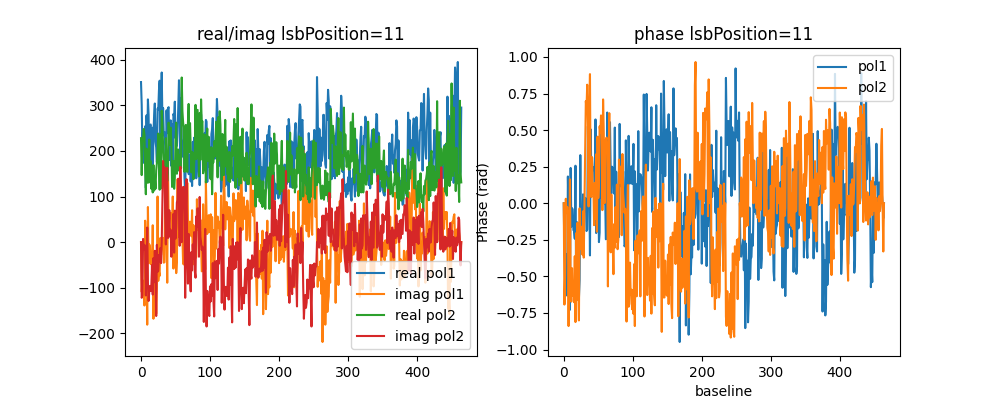

In [26]:
fig, ax = subplots(1,2, sharex=True)
lsb =11

ax[0].plot(dx[lsb,:,0,0], label='real pol1')
ax[0].plot(dx[lsb,:,0,1], label='imag pol1')
ax[0].plot(dx[lsb,:,1,0], label='real pol2')
ax[0].plot(dx[lsb,:,1,1], label='imag pol2')
ax[0].legend()
ax[1].plot(np.angle(dxc[lsb,:,0]), label='pol1')
ax[1].plot(np.angle(dxc[lsb,:,1]), label='pol2')
ax[1].legend()

ax[1].set_ylabel('Phase (rad)')
ax[0].set_title(f'real/imag lsbPosition={lsb}')
ax[1].set_title(f'phase lsbPosition={lsb}')
xlabel('baseline')
fig.set_size_inches(10,4)


<IPython.core.display.Javascript object>


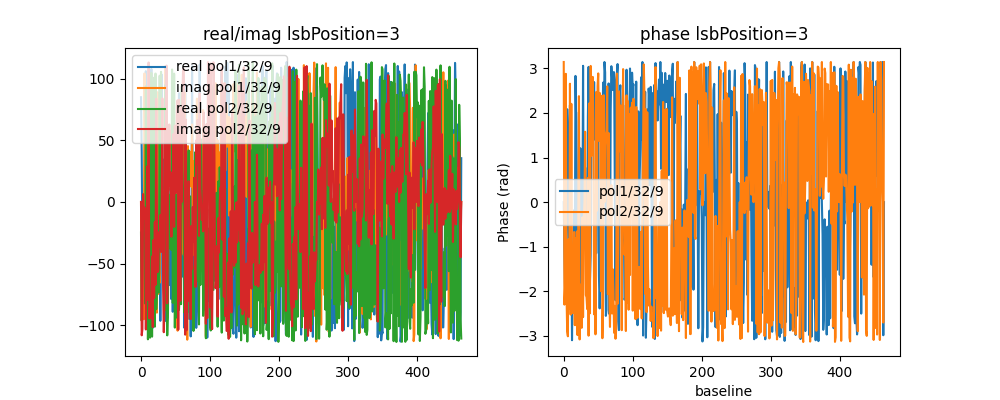

In [27]:

fig, ax = subplots(1,2, sharex=True)
lsb =3

ax[0].plot(dx[lsb,:,0,0]/32/9, label='real pol1/32/9')
ax[0].plot(dx[lsb,:,0,1]/32/9, label='imag pol1/32/9')
ax[0].plot(dx[lsb,:,1,0]/32/9, label='real pol2/32/9')
ax[0].plot(dx[lsb,:,1,1]/32/9, label='imag pol2/32/9')
ax[0].legend()
ax[1].plot(np.angle(dxc[lsb,:,0]/32/9), label='pol1/32/9')
ax[1].plot(np.angle(dxc[lsb,:,1]/32/9), label='pol2/32/9')
ax[1].legend()

ax[1].set_ylabel('Phase (rad)')
ax[0].set_title(f'real/imag lsbPosition={lsb}')
ax[1].set_title(f'phase lsbPosition={lsb}')
xlabel('baseline')
fig.set_size_inches(10,4)


In [28]:
drd.shape

(12, 92160, 1, 465, 2, 2)

<IPython.core.display.Javascript object>


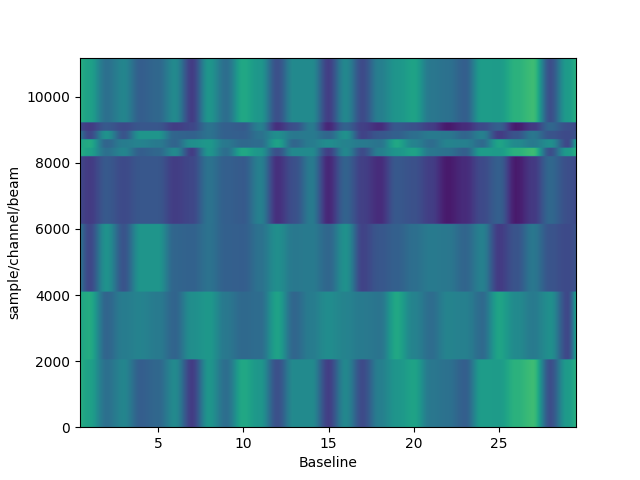

Text(0, 0.5, 'sample/channel/beam')

In [29]:
figure()
imshow(drd[-1,1:2048*4*4,0,:,0,0], aspect='auto', origin='lower')
xlabel('Baseline')
ylabel('sample/channel/beam')

In [30]:
drd.shape

(12, 92160, 1, 465, 2, 2)

In [45]:
drdb = []
for b in range(36):
    x = drd[:, darr['beam_number'][0,:] == b, ...]
    drdb.append(x)
    


In [46]:
darr['beam_number'].shape

(12, 92160)

In [47]:
drdb[0].shape

(12, 2560, 1, 465, 2, 2)

In [48]:
drdb = np.array(drdb)
drdb.shape

(36, 12, 2560, 1, 465, 2, 2)

In [50]:
drdb = drdb.reshape(36,12,10,4,64,465,2,2)

In [51]:
drdb.shape

(36, 12, 10, 4, 64, 465, 2, 2)

In [52]:
drdb = drdb.transpose([1,0,2,4,3,5,6,7])
drdb.shape

(12, 36, 10, 64, 4, 465, 2, 2)

In [53]:
drdb = drdb.reshape(12,36,10*64,4,465,2,2)

In [54]:
drdb.shape

(12, 36, 640, 4, 465, 2, 2)

<IPython.core.display.Javascript object>


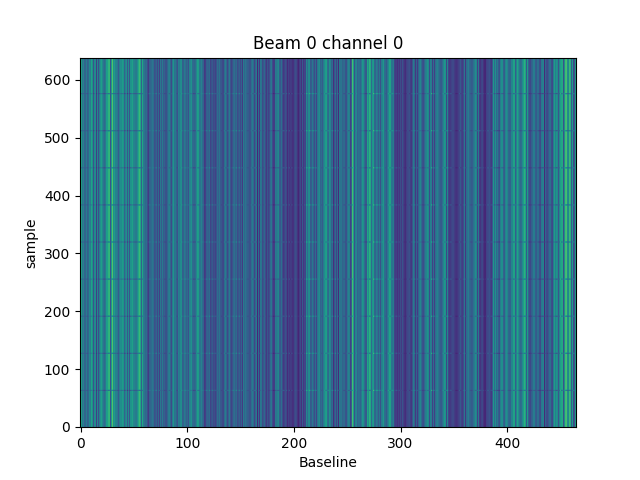

Text(0.5, 1.0, 'Beam 0 channel 0')

In [158]:
figure()
imshow(drdb[-1,0,1:,0,:,0,0], aspect='auto', origin='lower')
xlabel('Baseline')
ylabel('sample')
title('Beam 0 channel 0')

<IPython.core.display.Javascript object>


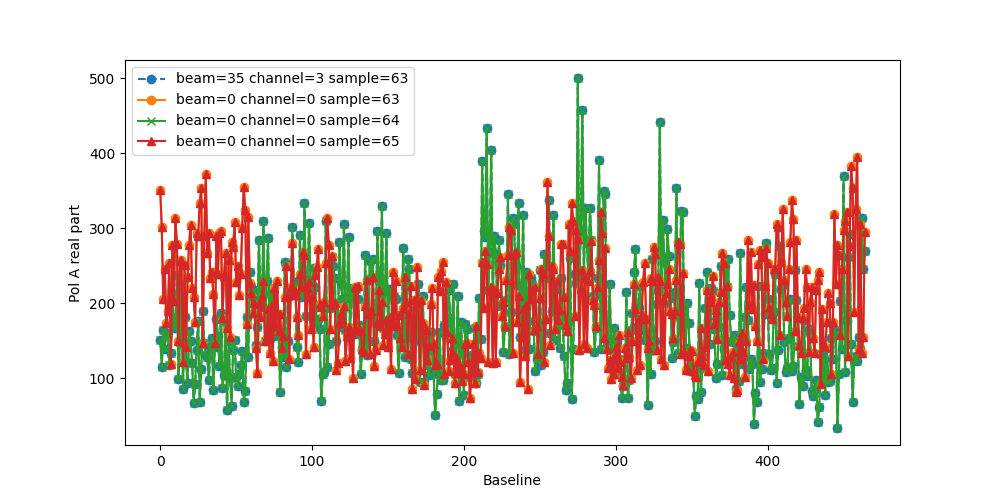

In [164]:
figure()
nbl=465

plot(drdb[-1,35,63,3,:nbl,0,0],'--o', label='beam=35 channel=3 sample=63')
#plot(drdb[-1,35,64,3,:nbl,0,0],'--o', label='beam=35 channel=3 sample=64')
#plot(drdb[-1,35,65,3,:nbl,0,0],'--^', label='beam=35 channel=3 sample=65')
plot(drdb[-1,0,63,0,:nbl,0,0],'-o', label='beam=0 channel=0 sample=63')
plot(drdb[-1,0,64,0,:nbl,0,0],'-x', label='beam=0 channel=0 sample=64')
plot(drdb[-1,0,65,0,:nbl,0,0],'-^', label='beam=0 channel=0 sample=65')



#plot(drdb[-1,0,66,0,:,0,0],'-+')
legend()
ylabel('Pol A real part')
xlabel('Baseline')
gcf().set_size_inches([10,5])


In [135]:
drdb.shape

(12, 36, 640, 4, 465, 2, 2)

In [192]:
drdbl = drdb[-1,:,64:,:,0,0,0].transpose([0,2,1]).reshape(36*4,-1)
drdbl.shape

(144, 576)

<IPython.core.display.Javascript object>


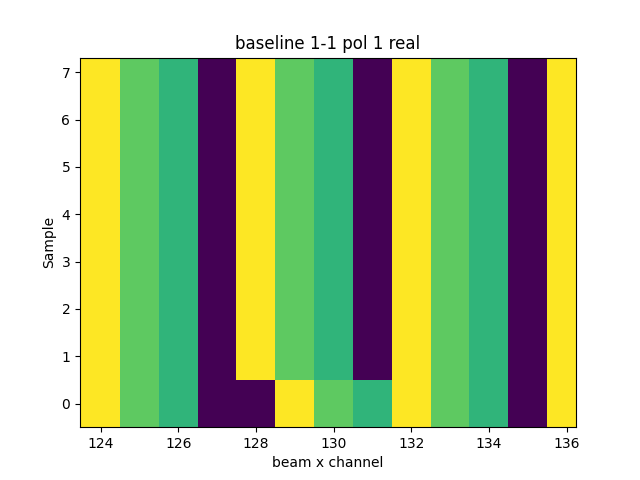

Text(0.5, 1.0, 'baseline 1-1 pol 1 real')

In [193]:
figure()
imshow(drdbl.T[:130:,:], aspect='auto', origin='lower', interpolation='none')
xlabel('beam x channel')
ylabel('Sample')
title('baseline 1-1 pol 1 real')

<IPython.core.display.Javascript object>


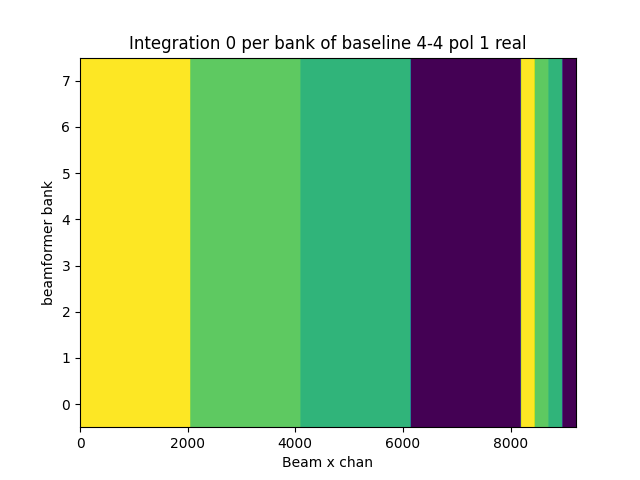

351 151


Text(0.5, 1.0, 'Integration 0 per bank of baseline 4-4 pol 1 real')

In [215]:
def axvbracket(t, *args, **kwargs):
    #axvline(t+0.5, c='r', *args, **kwargs)
    #axvline(t-0.5, c='r',*args, **kwargs)
    pass

figure()
blidx = 0
shift = -1
x2 = np.roll(pkts['data'][36*4*64::,0,blidx,0,0], shift)[::].reshape(-1,36*4*64)
print(x2.max(), x2.min())
imshow(x2[1:,:], aspect='auto', origin='lower')
axvbracket(0)
axvbracket(32)
axvbracket(32*2)
axvbracket(32*3)
axvbracket(32*4)
axvbracket(32*4)
axvbracket(33*4)
axvbracket(34*4)
axvbracket(35*4)
xlabel('Beam x chan')
ylabel('beamformer bank')
title('Integration 0 per bank of baseline 4-4 pol 1 real')

In [119]:
badx = drdb[-1,0,64,0,:,0,0]
drdb.shape

(12, 36, 640, 4, 465, 2, 2)

In [86]:
max(badx)

501

In [90]:
badidxs = np.where(drdb[-1,...] == max(badx))
badidxs

(array([ 0,  0,  0, ..., 35, 35, 35]),
 array([  1,   2,   3, ..., 637, 638, 639]),
 array([3, 3, 3, ..., 3, 3, 3]),
 array([275, 275, 275, ..., 275, 275, 275]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [91]:
badidxs[0]

array([ 0,  0,  0, ..., 35, 35, 35])

<IPython.core.display.Javascript object>


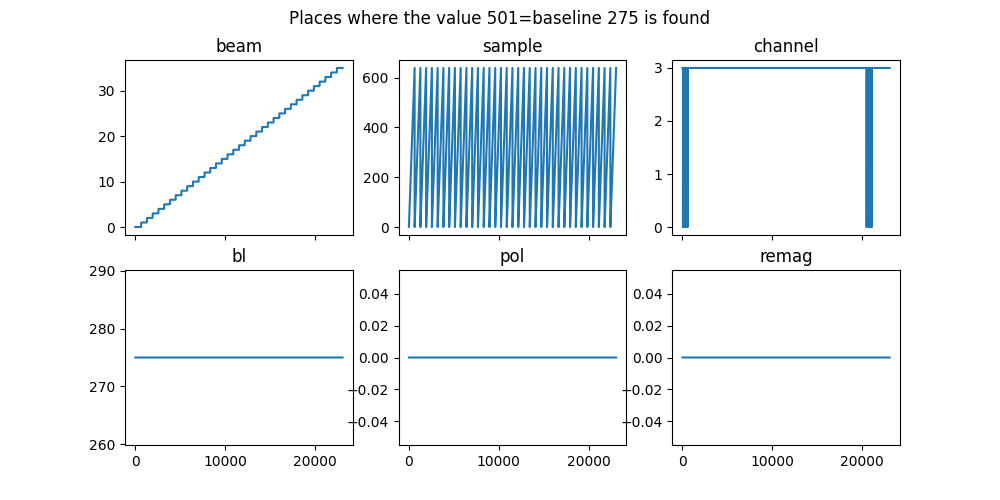

Text(0.5, 0.98, 'Places where the value 501=baseline 275 is found')

In [168]:
fig,axs = subplots(2,3, sharex=True)
fig.set_size_inches([10,5])
titles = ('beam','sample','channel','bl','pol','remag')
for i in range(len(badidxs)):
    axs.flat[i].plot(badidxs[i],'-')
    axs.flat[i].set_title(titles[i])
    
fig.suptitle('Places where the value 501=baseline 275 is found')


In [172]:
drd.shape

(12, 92160, 1, 465, 2, 2)

<IPython.core.display.Javascript object>


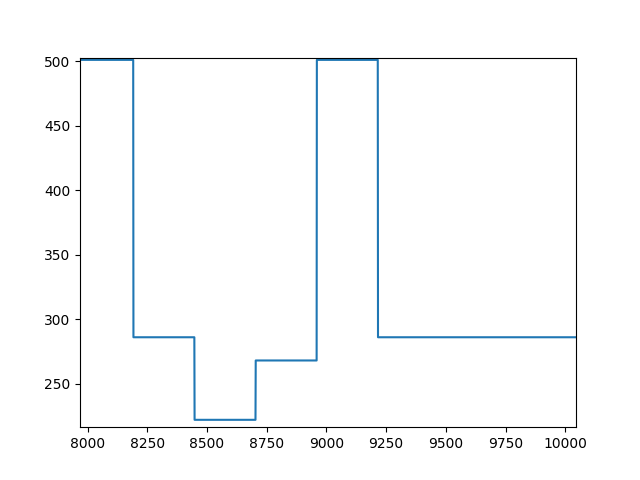

In [175]:
figure()
plot(drd[-1,1:,0,275,0,0])

In [176]:
drdb.shape

(12, 36, 640, 4, 465, 2, 2)